In [1]:
import pandas as pd
import numpy as np



from sklearn.metrics import mean_absolute_error as mae

from fbprophet import Prophet

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/visits.csv'
df = pd.read_csv(path, parse_dates=['published'], index_col ='published' )

df.head()

,post_id
published,
2008-01-01 18:19:00,18284
2008-01-01 18:30:00,18285
2008-01-01 18:34:00,18286
2008-01-02 01:32:00,18291
2008-01-02 14:34:00,18294


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134137 entries, 2008-01-01 18:19:00 to 2016-10-31 23:56:00
Data columns (total 1 columns):
post_id    134137 non-null int64
dtypes: int64(1)
memory usage: 2.0 MB


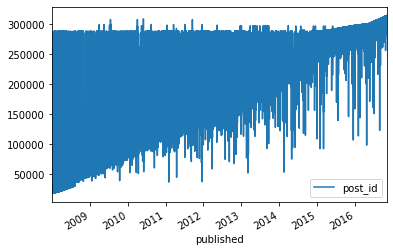

In [7]:
df.plot();

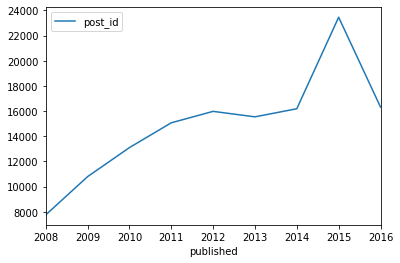

In [13]:
pd.plotting.register_matplotlib_converters()
df.resample('Y').count().plot();

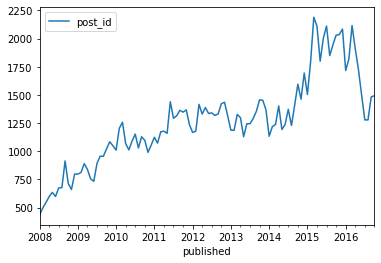

In [14]:
df.resample('M').count().plot();

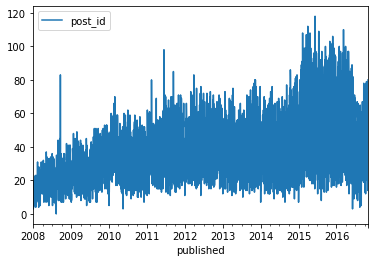

In [15]:
df.resample('D').count().plot();

Przygotowanie danych dla Prohet
Prophet potrzebuje dwóch kolumn
jedna z osią czasu o nazwie:ds
druga z danymi o nazwie:y


In [18]:
df_day = df.resample('D').count().reset_index()
df_day.columns = ['ds','y']

df_day

,ds,y
0,2008-01-01,3
1,2008-01-02,3
2,2008-01-03,4
3,2008-01-04,14
4,2008-01-05,4
5,2008-01-06,7
6,2008-01-07,17
7,2008-01-08,8
8,2008-01-09,15
9,2008-01-10,20


# Prophet

In [86]:
num_points_to_pred = 100

train = df_day[:-num_points_to_pred]
test = df_day[-num_points_to_pred:]

In [87]:
m = Prophet()

m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [88]:
future = m.make_future_dataframe(periods=num_points_to_pred, freq='D', include_history=True)
#future.tail()

In [89]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-01,17.375682,4.322587,32.852981,17.375682,17.375682,1.517179,1.517179,1.517179,11.674800,11.674800,11.674800,-10.157621,-10.157621,-10.157621,0.0,0.0,0.0,18.892861
1,2008-01-02,17.397727,2.272694,31.086195,17.397727,17.397727,-0.677391,-0.677391,-0.677391,9.688338,9.688338,9.688338,-10.365730,-10.365730,-10.365730,0.0,0.0,0.0,16.720335
2,2008-01-03,17.419771,1.256679,30.330177,17.419771,17.419771,-2.058963,-2.058963,-2.058963,8.410943,8.410943,8.410943,-10.469906,-10.469906,-10.469906,0.0,0.0,0.0,15.360808
3,2008-01-04,17.441815,-2.016060,26.797785,17.441815,17.441815,-5.824228,-5.824228,-5.824228,4.643397,4.643397,4.643397,-10.467625,-10.467625,-10.467625,0.0,0.0,0.0,11.617588
4,2008-01-05,17.463860,-31.376365,-0.134506,17.463860,17.463860,-33.554695,-33.554695,-33.554695,-23.196695,-23.196695,-23.196695,-10.358000,-10.358000,-10.358000,0.0,0.0,0.0,-16.090835


In [90]:
def plot_forecast(test, forecast, num_points_to_pred):
    forecast = forecast[-num_points_to_pred:]
    score = np.round(mae(test.y, forecast.yhat),2)
    plt.figure(figsize=(15,5))
    plt.title('Forecast last {} points.\nmae:{}\nProphet'.format(num_points_to_pred,score))
    plt.plot(test.ds, test.y, 'o-', label='true');
    plt.plot(test.ds, forecast.yhat, label = 'forecast');
    plt.legend();


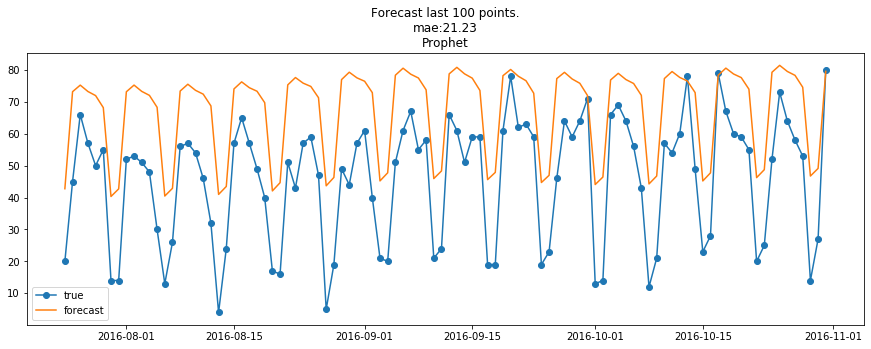

In [91]:
plot_forecast(test,forecast,num_points_to_pred);

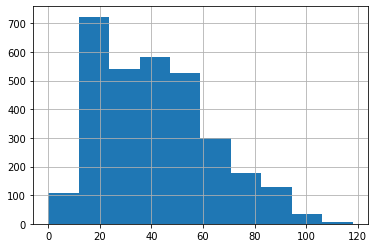

In [92]:
train.y.hist();

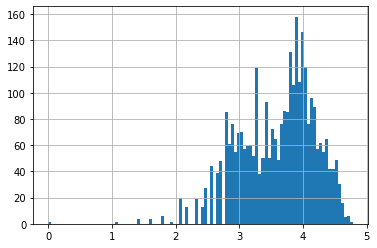

In [93]:
np.log1p(train.y).hist(bins=100);

In [94]:
num_points_to_pred = 100

train = df_day[:-num_points_to_pred]
test = df_day[-num_points_to_pred:]

train_log = train.copy()
train_log['y']=np.log1p(train['y'])

In [99]:
m = Prophet(changepoint_prior_scale=0.01)
m.fit(train_log)
future = m.make_future_dataframe(periods=num_points_to_pred, freq='D', include_history=False)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [100]:
forecast = m.predict(future)
forecast['yhat'] = np.expm1(forecast.yhat)

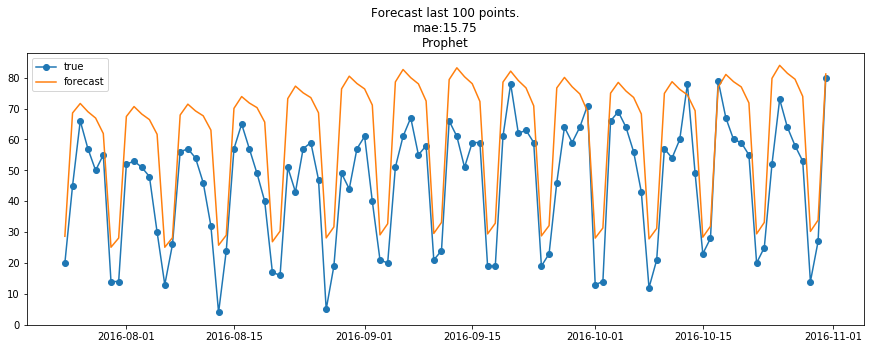

In [101]:
plot_forecast(test,forecast, num_points_to_pred);

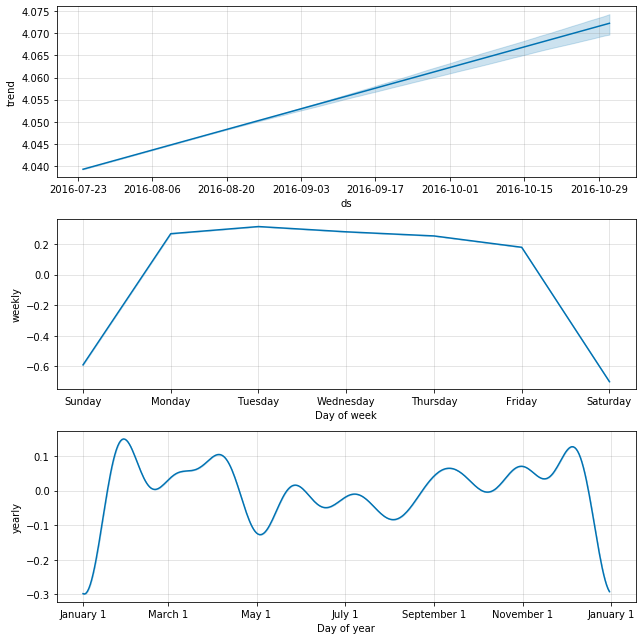

In [102]:
m.plot_components(forecast);

# Validacja za pomocą Prohet

Prophet dostarcza możliwość trenowania i walidowania modelu na bazie danych historyczny przesuwając się po nich o określone okno. Można to wykorzystać aby model nie tylko prognozował dobrze końcówkę ale aby był uśredniony na bazie wszystkich danych

In [46]:
len(train), len(test)

(3197, 30)

In [47]:
from fbprophet.diagnostics import  cross_validation

df_cv = cross_validation(m, initial='2500 days', period='10 days', horizon='30 days')

INFO:fbprophet:Making 67 forecasts with cutoffs between 2014-11-11 00:00:00 and 2016-09-01 00:00:00


In [48]:
df_cv.shape

(2010, 6)

In [50]:
df_cv.groupby('cutoff').count()

,ds,yhat,yhat_lower,yhat_upper,y
cutoff,,,,,
2014-11-11,30,30,30,30,30
2014-11-21,30,30,30,30,30
2014-12-01,30,30,30,30,30
2014-12-11,30,30,30,30,30
2014-12-21,30,30,30,30,30
2014-12-31,30,30,30,30,30
2015-01-10,30,30,30,30,30
2015-01-20,30,30,30,30,30
2015-01-30,30,30,30,30,30


In [51]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [52]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,coverage
0,3 days,371.150304,19.265262,16.287132,0.565282,0.427861
1,4 days,335.708456,18.322349,15.714201,0.436009,0.422886
2,5 days,346.736224,18.620855,15.821907,0.476809,0.452736
3,6 days,349.748861,18.701574,15.630649,0.459993,0.472637
4,7 days,377.628811,19.432674,16.180060,0.468095,0.452736
5,8 days,369.660024,19.226545,15.836047,0.437173,0.467662
6,9 days,360.744145,18.993266,15.715614,0.436389,0.457711
7,10 days,404.194842,20.104598,16.477319,0.472467,0.447761
8,11 days,417.506722,20.432981,16.715496,0.585568,0.432836
9,12 days,424.200999,20.596140,17.209722,0.588146,0.412935


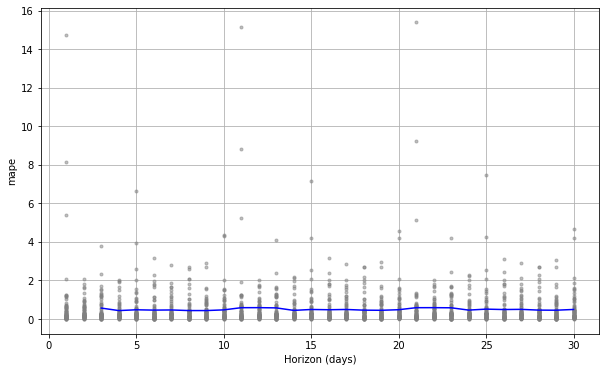

In [56]:
plot_cross_validation_metric(df_cv, 'mape');

# Bardziej zaawansowane

boxcox

Rodzina (S)ARIMA(X)

rekurencyjne sieci neuronowe

wygładzenie wykładnicze